In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns


In [125]:
df = pd.read_csv('Suicides in India 2001-2012.csv')

In [126]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [127]:
df.info()
#hence we have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [128]:
#data cleaning- removing the state/UT diffrences, corecting typos of some labels




df.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Delhi (Ut)', 'Delhi', inplace=True)
df.replace('Bankruptcy or Sudden change in Economic', 
'Bankruptcy or Sudden change in Economic Status', inplace=True)
df.replace('By Other means (please specify)', 'By Other means', inplace=True)
df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency)', inplace=True)

#removing labels which cumulate the counts for all UT's, states and entire India 

df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

#removing unspecified labes
df=df.drop(df[(df.Type =='By Other means')|(df.Type=='Other Causes (Please Specity)')|
                    (df.Type=='Others (Please Specify)')|(df.Type=='Causes Not known')].index)

#removing rows for causes where total suicides are 0. this hugely lightens the  dataset by keeping 
#meaningful records only.
df = df.drop(df[df['Total'] == 0].index)
df.to_csv('cleaned_data.csv')

In [129]:
df.shape

(86576, 7)

### 1. Suicide by gender - more men commiting suicide than woman

<AxesSubplot:xlabel='Gender', ylabel='Total'>

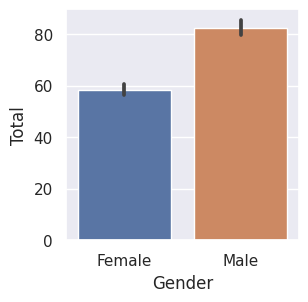

In [130]:
sns.set(rc={'figure.figsize':(3,3)})
sns.barplot(x = df['Gender'], y = df['Total'])

#uses: target equal if not more attention/funds towards men

### 2.Suicide count by state- highest is maharashtra, lowest is lakshwadeep

[Text(0, 0, 'Lakshadweep'),
 Text(1, 0, 'Daman & Diu'),
 Text(2, 0, 'Nagaland'),
 Text(3, 0, 'Manipur'),
 Text(4, 0, 'D & N Haveli'),
 Text(5, 0, 'Mizoram'),
 Text(6, 0, 'Meghalaya'),
 Text(7, 0, 'Chandigarh'),
 Text(8, 0, 'Arunachal Pradesh'),
 Text(9, 0, 'A & N Islands'),
 Text(10, 0, 'Sikkim'),
 Text(11, 0, 'Jammu & Kashmir'),
 Text(12, 0, 'Goa'),
 Text(13, 0, 'Uttarakhand'),
 Text(14, 0, 'Himachal Pradesh'),
 Text(15, 0, 'Puducherry'),
 Text(16, 0, 'Bihar'),
 Text(17, 0, 'Tripura'),
 Text(18, 0, 'Jharkhand'),
 Text(19, 0, 'Punjab'),
 Text(20, 0, 'Delhi'),
 Text(21, 0, 'Haryana'),
 Text(22, 0, 'Assam'),
 Text(23, 0, 'Rajasthan'),
 Text(24, 0, 'Uttar Pradesh'),
 Text(25, 0, 'Odisha'),
 Text(26, 0, 'Chhattisgarh'),
 Text(27, 0, 'Gujarat'),
 Text(28, 0, 'Madhya Pradesh'),
 Text(29, 0, 'Kerala'),
 Text(30, 0, 'Karnataka'),
 Text(31, 0, 'Tamil Nadu'),
 Text(32, 0, 'Andhra Pradesh'),
 Text(33, 0, 'West Bengal'),
 Text(34, 0, 'Maharashtra')]

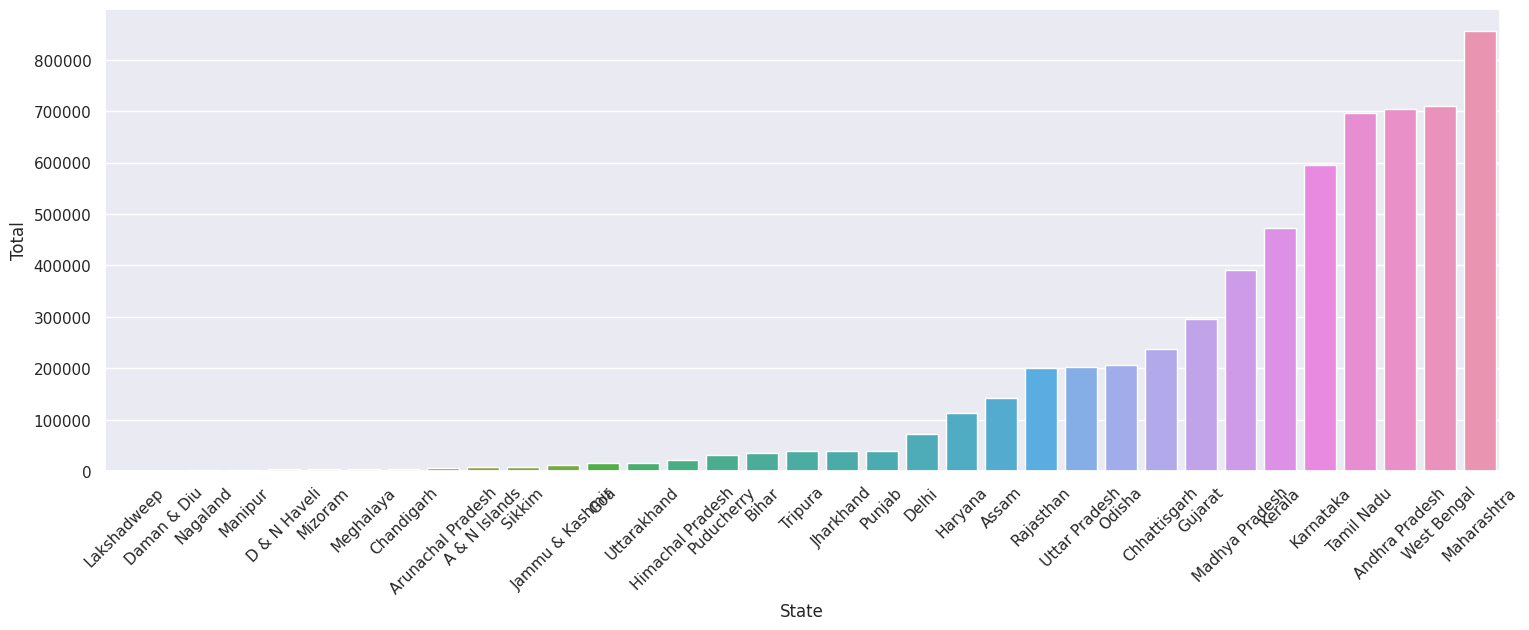

In [131]:
grp = df.groupby('State')['Total'].sum()
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total')

import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'State', y = 'Total',data = total_suicides)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
#uses- state wise focus


### 3.Suicides by year- a gradual increase every year, except for a dip in last year


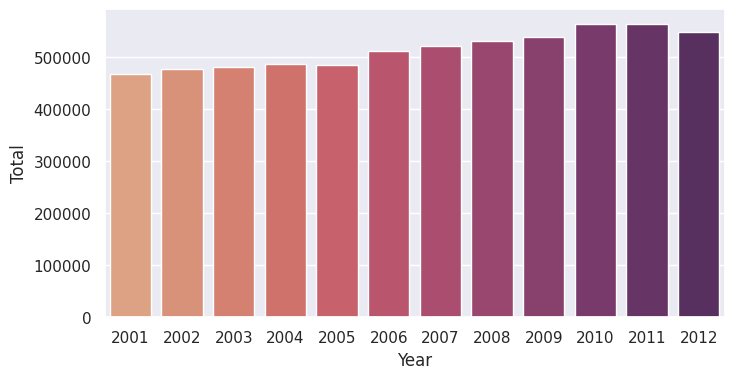

In [132]:
grp_yr = df.groupby('Year')['Total'].sum()
year = pd.DataFrame(grp_yr).reset_index().sort_values('Year',ascending=False)
sns.set(rc={'figure.figsize':(8,4)})
g = sns.barplot(x='Year',y='Total',data=year,palette = 'flare')
# undertand socio-economic changes fuelling the rise in suicides

### 4.Analysing suicides by causes - top causes are mental/prolonged health reasons, family problems, etc.

Types of causes are:
 ['Love Affairs' 'Other Prolonged Illness' 'Failure in Examination'
 'Family Problems' 'Insanity/Mental Illness' 'Death of Dear Person'
 'Unemployment' 'Fall in Social Reputation' 'Suspected/Illicit Relation'
 'Cancellation/Non-Settlement of Marriage'
 'Not having Children (Barrenness/Impotency)' 'Poverty'
 'Professional/Career Problem' 'Paralysis'
 'Bankruptcy or Sudden change in Economic Status' 'Divorce' 'Cancer'
 'Property Dispute' 'Illness (Aids/STD)'
 'Physical Abuse (Rape/Incest Etc.)' 'Drug Abuse/Addiction'
 'Ideological Causes/Hero Worshipping' 'Dowry Dispute'
 'Illegitimate Pregnancy' 'Not having Children (Barrenness/Impotency']


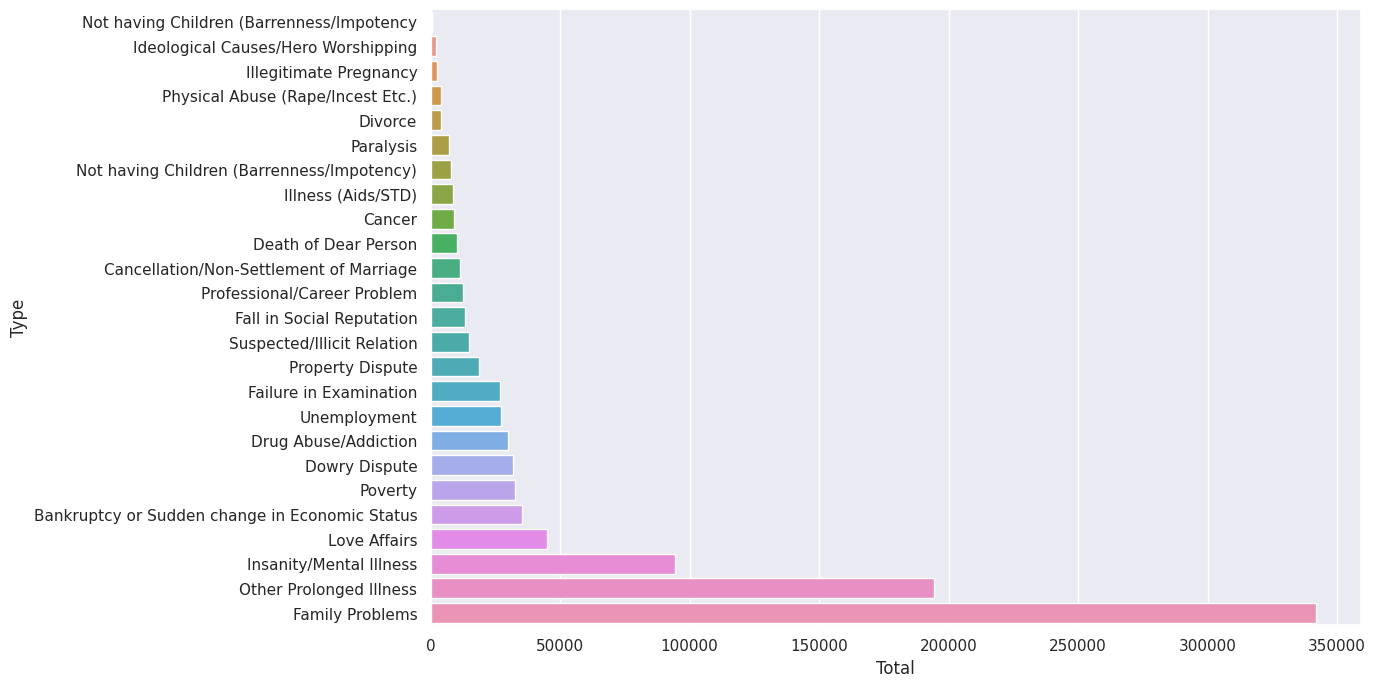

In [133]:
df_by_code = df[df['Type_code'] == 'Causes']
print("Types of causes are:\n",df_by_code['Type'].unique())

df_by_causes = df_by_code.groupby('Type')['Total'].sum()
df_by_causes_type = pd.DataFrame(df_by_causes).reset_index().sort_values('Total')
fig , ax = plt.subplots(figsize=(12,8))
g = sns.barplot(x = df_by_causes_type['Total'], y = df_by_causes_type['Type'])

### 5. Suicide by education level - a gradual decrease in suicides by higher levels of education 

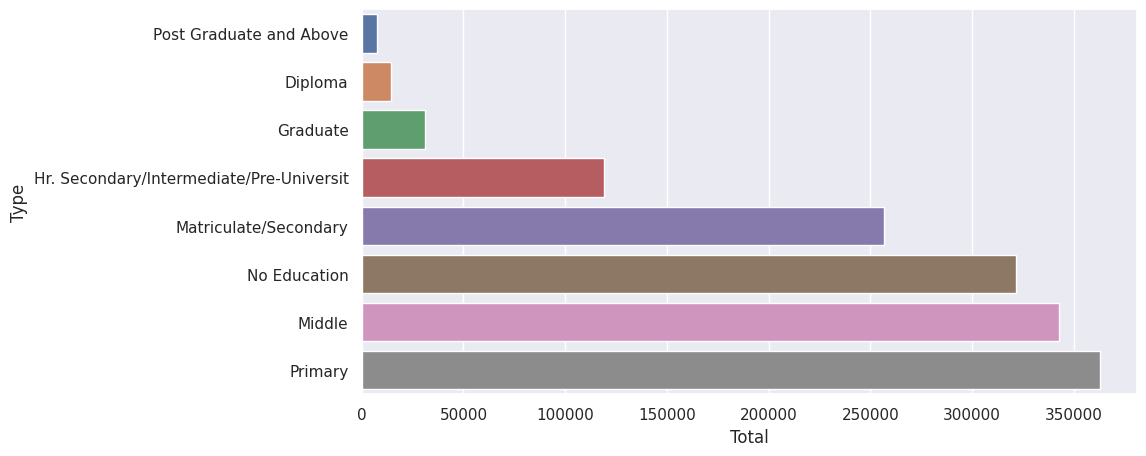

In [134]:
df_by_code = df[df['Type_code'] == 'Education_Status']
df_by_code['Type'].unique()

df_by_education = df_by_code.groupby('Type')['Total'].sum()
df_by_education_type = pd.DataFrame(df_by_education).reset_index().sort_values('Total')
#print('Total people who have their social status mentioned in the data {}'.format(df_by_code.shape[0]))
labels = df_by_education_type['Type']

fig , ax = plt.subplots(figsize=(10,5))
g = sns.barplot(x = df_by_education_type['Total'], y = labels)
#uses- increase %gdp in education; implement NEP2020 rigorously

In [135]:
#before normalisation
tenth_before_norm = pd.DataFrame(df.iloc[9:10,:])
display(tenth_before_norm)

#doing  normalisation

# copy the data
df_min_max_scaled = df.copy()
  
# apply normalization techniques:
for column in df_min_max_scaled[['Total']]:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

# view normalized data of tenth row after normalization
tenth_after = pd.DataFrame(df_min_max_scaled.iloc[9:10,:])
display(tenth_after)

#the 10th row of dataframe is indexed at 9; and refers to the 11th in raw dataset visualisation using excel

,State,Year,Type_code,Type,Gender,Age_group,Total
89,A & N Islands,2001,Causes,Love Affairs,Male,15-29,3


,State,Year,Type_code,Type,Gender,Age_group,Total
89,A & N Islands,2001,Causes,Love Affairs,Male,15-29,0.000228


In [136]:
#before standardization
tenth_before_std = pd.DataFrame(df.iloc[9:10,:])
display(tenth_before_std)

#doing standardization
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
col=['Total']
scaled_data = scale.fit_transform(df[col])
# my_array = np.array(scaled_data)
new_df = pd.DataFrame(scaled_data, columns = ['Total'])
tenth_after = new_df.iloc[10:11,:]
display(tenth_after)
# #new_df.head(13)

,State,Year,Type_code,Type,Gender,Age_group,Total
89,A & N Islands,2001,Causes,Love Affairs,Male,15-29,3


,Total
10,-0.241638


### standardisation vs normalisation
standardisation used when distribution is gaussian .
since standardization is much less afftected by outliers, its used when quite many outliers exist.
used when we don't wanna bound values by a range.
used when we want to ensure zero mean and unit standard deviation.

normalisation is used when distribution is unknown.
since normalisation is afftected by outliers, its used when no outliers exist.
used when we've to bound values by a range[0,1]


 

# Q2


In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [6]:
files=os.listdir(os.getcwd()+'/MiMM-SBILab')# set path to access the file
len(files)

85

In [138]:
img1_name=random.choice(files)
files.remove(img1_name)

img2_name=random.choice(files)
files.remove(img2_name)

img3_name = random.choice(files)
files.remove(img3_name)

print(img1_name)
print(img2_name)
print(img3_name)

113.bmp
306.bmp
504.bmp


In [139]:
def getPhotos():
    return os.getcwd()+'/MiMM-SBILab/'

In [140]:
img1 = cv2.imread(getPhotos() + img1_name)
img2 = cv2.imread(getPhotos() + img2_name)
img3 = cv2.imread(getPhotos() + img3_name)

resizing to 1280x960
resizing to 1280x960
resizing to 1280x960


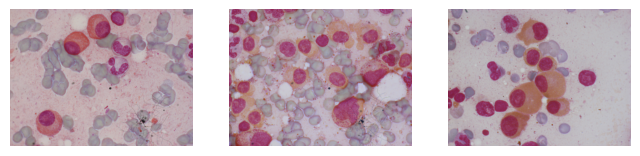

In [141]:
x = 1
fig = plt.figure(figsize = (8,5))

def resize(img):
    global x
    l1 = int(len(img)/2)
    l2 = int(len(img[0])/2)
    print('resizing to '+ str(l2) + 'x' + str(l1))
    img_resize = cv2.resize(img, (l2, l1))
    fig.add_subplot(1, 3, x)
    x = x + 1
    plt.imshow(img_resize)
    plt.axis('off')

resize(img1)
resize(img2)
resize(img3)


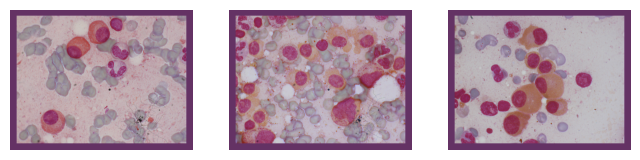

In [142]:
x = 1
fig = plt.figure(figsize = (8,5))
def pad(img):
    global x
    image_height, image_width, channels = img.shape
    color = (100,50,100)
    result = np.full((image_height + 200, image_width+200, channels), color, dtype=np.uint8)#create 3d matrix storing initial colurs for r,g,b values of cell
    x_center = 100
    y_center = 100
    result[y_center:y_center+image_height, x_center:x_center+image_width] = img #add the image on the original prple coloured image
    fig.add_subplot(1,3, x)
    x = x + 1
    plt.imshow(result)
    plt.axis('off')
pad(img1)
pad(img2)
pad(img3)

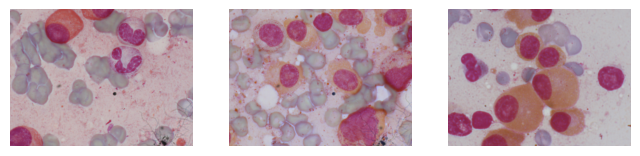

In [143]:
x = 1
fig = plt.figure(figsize = (8,5))
def cropped(img):
    global x
    image_height, image_width, channels = img.shape
    result = img[int(image_height/6):image_height-int(image_height/6),int(image_width/6):image_width-int(image_width/6)]
    fig.add_subplot(1,3,x)
    x = x + 1
    plt.imshow(result)
    plt.axis('off')

cropped(img1)
cropped(img2)
cropped(img3)

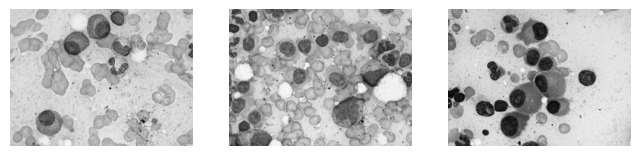

In [144]:
x = 1
fig = plt.figure(figsize = (8,5))
def grayscale(img):
    global x
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fig.add_subplot(1,3, x)
    x = x + 1
    plt.imshow(gray,cmap='gray')
    plt.axis('off')
grayscale(img1)
grayscale(img2)
grayscale(img3)

In [145]:
img1[0][0][0] #its 3d array of list containing 3 numbers

187

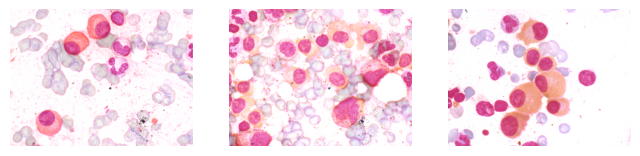

In [146]:
x = 1
fig = plt.figure(figsize = (8,5))
def contrast(img):
    global x
    alpha = 1.5
    beta = 0 
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    fig.add_subplot(1,3, x)
    x = x + 1
    plt.imshow(adjusted)
    plt.axis('off')
contrast(img1)
contrast(img2)
contrast(img3)


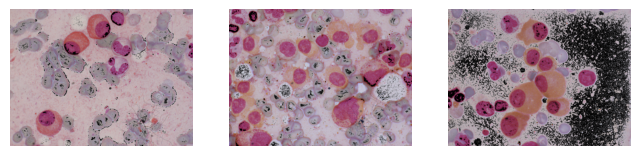

In [147]:
x = 1
fig = plt.figure(figsize = (8,5))
def saturation(img):
    global x
    hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0,10, 0])
    upper_red = np.array([255,180,255])

    mask = cv2.inRange(hsvImage, lower_red, upper_red)
    res = cv2.bitwise_and(img,img, mask= mask)
    fig.add_subplot(1,3, x)
    x = x + 1
    plt.imshow(res)
    plt.axis('off')
saturation(img1)
saturation(img2)
saturation(img3)

# Q3

In [148]:
pip install idx2numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import idx2numpy


In [16]:
x_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

#print train dataset and label's shape
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [31]:
y_train
index= np.where(y_train==0)
print(index)


(array([    1,    21,    34, ..., 59952, 59972, 59987]),)


1
21


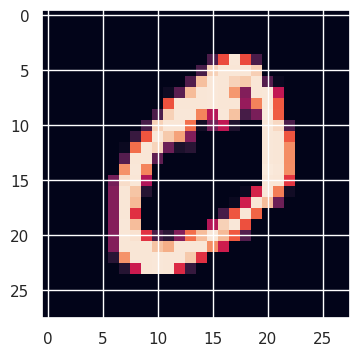

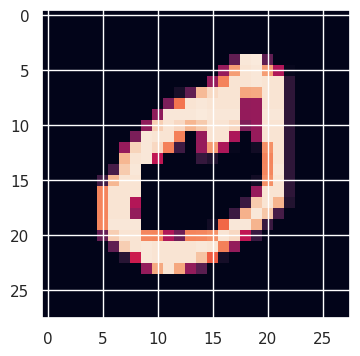

3
6


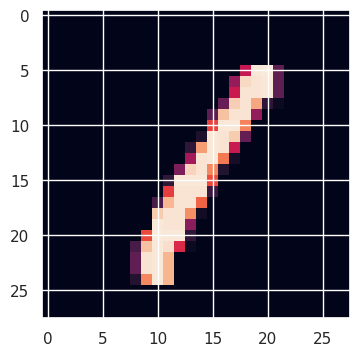

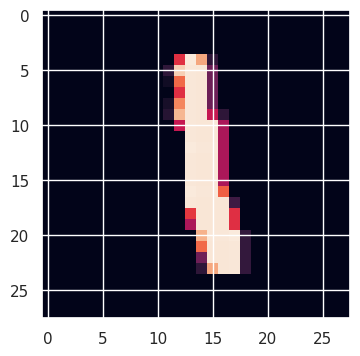

5
16


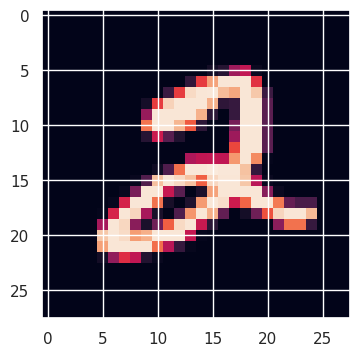

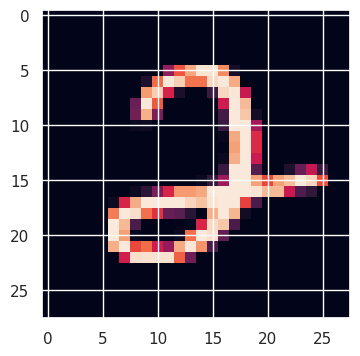

7
10


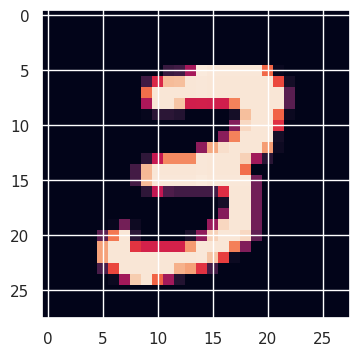

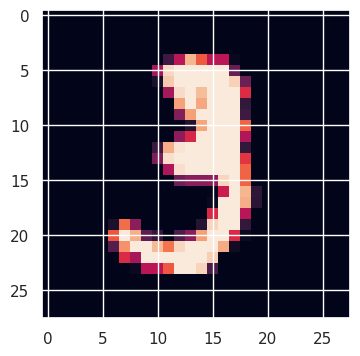

2
9


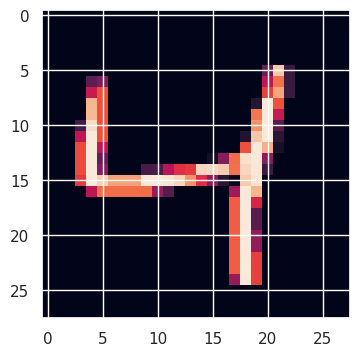

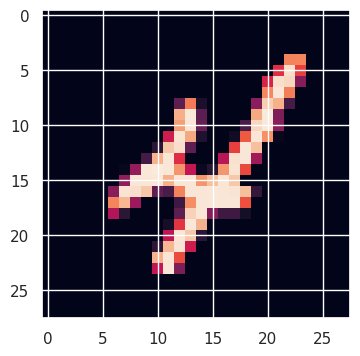

0
11


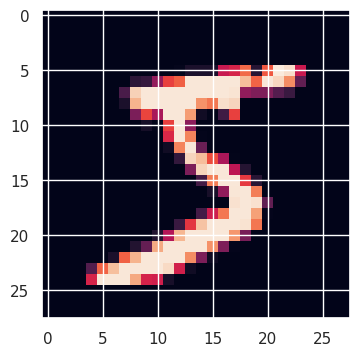

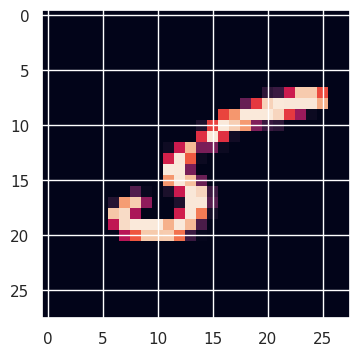

13
18


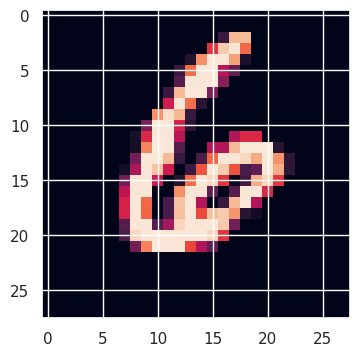

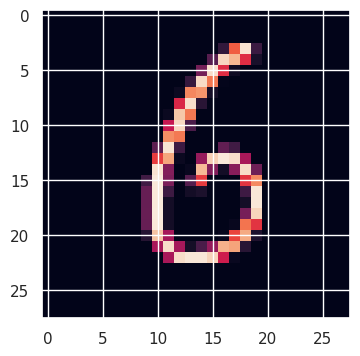

15
29


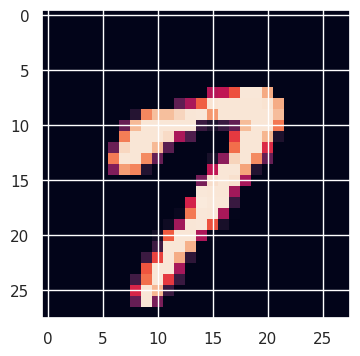

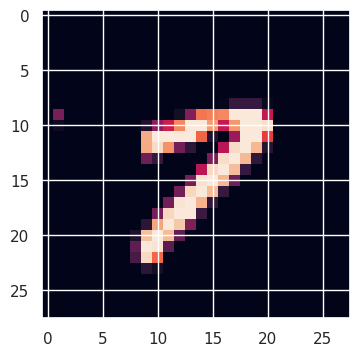

17
31


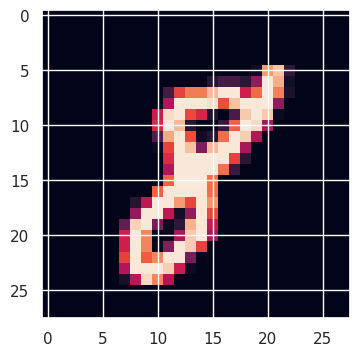

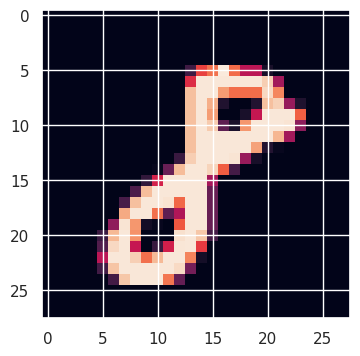

4
19


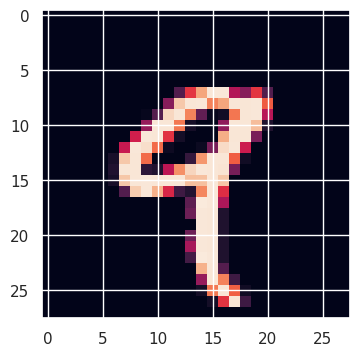

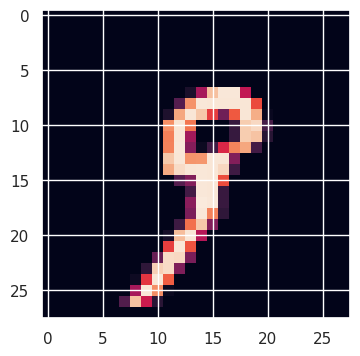

In [151]:
# fig.add_subplot(10,2,i)
for i in range(10):
    index= np.where(y_train==i)
    print(index[0][0])
    print(index[0][1])
    plt.imshow(x_train[index[0][0]])
    plt.show()
    plt.imshow(x_train[index[0][1]])
    plt.show()
    

In [152]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [153]:
x_train=x_train.reshape(60000, 784)
x_test=x_test.reshape(10000, 784)
lr_ovo=OneVsOneClassifier(LogisticRegression(n_jobs=-1,random_state=0),n_jobs=-1).fit(x_train,y_train)
y_predicted_ovo = lr_ovo.predict(x_test)

print('predicted labels for test dataset using OVO:',y_predicted_ovo)

cm_ovo = metrics.confusion_matrix(y_test, y_predicted_ovo)
print(cm_ovo)

for i in range(10):
    print('accuracy label:',i,' = ', cm_ovo[i][i]/sum(cm_ovo[i]))
#

predicted labels for test dataset using OVO: [7 2 1 ... 4 5 6]
[[ 951    0    7    1    1    7    6    2    4    1]
 [   0 1109    5    3    0    1    2    1   14    0]
 [   3    9  942   12    7    5    9   12   29    4]
 [   2    2    9  930    1   25    2    7   30    2]
 [   2    0    9    0  939    1    5    3    4   19]
 [  10    5    6   36    5  772   12    3   34    9]
 [   6    1   16    2    5   22  901    0    5    0]
 [   2    3   21   12   13    0    0  952    5   20]
 [   7    4    6   22    7   27    7    7  875   12]
 [   6    7    2   11   33    6    1   23   14  906]]
accuracy label: 0  =  0.9704081632653061
accuracy label: 1  =  0.9770925110132158
accuracy label: 2  =  0.9127906976744186
accuracy label: 3  =  0.9207920792079208
accuracy label: 4  =  0.9562118126272913
accuracy label: 5  =  0.8654708520179372
accuracy label: 6  =  0.9405010438413361
accuracy label: 7  =  0.9260700389105059
accuracy label: 8  =  0.8983572895277208
accuracy label: 9  =  0.8979187314172

In [154]:

lr_ovr=OneVsRestClassifier(LogisticRegression(n_jobs=-1,random_state=1),n_jobs=-1).fit(x_train,y_train)
y_predicted_ovr = lr_ovr.predict(x_test)

print('predicted labels for test dataset using OVR:',y_predicted_ovr)

cm_ovr = metrics.confusion_matrix(y_test, y_predicted_ovr)
print(cm_ovr)

for i in range(10):
    print('accuracy label:',i,' = ', cm_ovr[i][i]/sum(cm_ovr[i]))

predicted labels for test dataset using OVR: [7 2 1 ... 4 5 6]
[[ 957    0    0    4    0    3    6    2    6    2]
 [   0 1116    3    1    0    1    4    1    8    1]
 [   8   12  905   18    9    5   10   11   51    3]
 [   3    0   19  915    2   22    5   11   25    8]
 [   1    2    4    3  910    0   12    2   10   38]
 [  11    2    1   34   10  762   16    7   40    9]
 [   7    3    7    2    4   17  909    1    8    0]
 [   3    6   24    4    7    1    1  945    5   32]
 [   9   14    7   22   11   27    7   12  854   11]
 [   9    6    2   13   30    4    0   24   16  905]]
accuracy label: 0  =  0.976530612244898
accuracy label: 1  =  0.9832599118942731
accuracy label: 2  =  0.876937984496124
accuracy label: 3  =  0.905940594059406
accuracy label: 4  =  0.9266802443991853
accuracy label: 5  =  0.8542600896860987
accuracy label: 6  =  0.9488517745302714
accuracy label: 7  =  0.919260700389105
accuracy label: 8  =  0.8767967145790554
accuracy label: 9  =  0.8969276511397423


/home/ayush/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

/home/ayush/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

# Q6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Q6Data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()
df['Age'] = df['Age'].fillna(value=df['Age'].median())

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train, test = train_test_split(df, test_size=0.2)

In [6]:
train.shape

(712, 12)

In [7]:
test.shape

(179, 12)

In [8]:
train_data = train.drop(columns=['Ticket', 'PassengerId', 'Cabin', 'Name'])

In [9]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
746,0,3,male,16.0,1,1,20.2500,S
781,1,1,female,17.0,1,0,57.0000,S
173,0,3,male,21.0,0,0,7.9250,S
127,1,3,male,24.0,0,0,7.1417,S
418,0,2,male,30.0,0,0,13.0000,S


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 746 to 482
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [11]:
train_data = pd.get_dummies(train_data)

In [12]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
746,0,3,16.0,1,1,20.2500,0,1,0,0,1
781,1,1,17.0,1,0,57.0000,1,0,0,0,1
173,0,3,21.0,0,0,7.9250,0,1,0,0,1
127,1,3,24.0,0,0,7.1417,0,1,0,0,1
418,0,2,30.0,0,0,13.0000,0,1,0,0,1


In [13]:
test_data = test.drop(columns=['Ticket', 'PassengerId', 'Cabin', 'Name'])

In [14]:
test_data = pd.get_dummies(test_data)

In [15]:
test_data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [16]:
x_train = train_data.drop(columns='Survived')

In [17]:
x_test = test_data.drop(columns='Survived')

In [18]:
y_train = train_data['Survived']

In [19]:
y_test = test_data['Survived']

In [20]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
746,3,16.0,1,1,20.2500,0,1,0,0,1
781,1,17.0,1,0,57.0000,1,0,0,0,1
173,3,21.0,0,0,7.9250,0,1,0,0,1
127,3,24.0,0,0,7.1417,0,1,0,0,1
418,2,30.0,0,0,13.0000,0,1,0,0,1


In [21]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
497,3,28.0,0,0,15.1000,0,1,0,0,1
228,2,18.0,0,0,13.0000,0,1,0,0,1
73,3,26.0,1,0,14.4542,0,1,1,0,0
77,3,28.0,0,0,8.0500,0,1,0,0,1
17,2,28.0,0,0,13.0000,0,1,0,0,1


In [22]:
y_train.head(5)

746    0
781    1
173    0
127    1
418    0
Name: Survived, dtype: int64

In [23]:
y_test.head()

497    0
228    0
73     0
77     0
17     1
Name: Survived, dtype: int64

In [24]:
y_train.to_csv('y_train.csv')
x_train.to_csv('x_train.csv')


In [25]:
x_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [26]:
from annealing import simulated_annealing

In [27]:
results, best_metric, best_subset_cols = simulated_annealing(x_train, y_train)

Starting Iteration 1
New subset has worse performance but still accept. Metric change:  0.0000, Acceptance probability:1.0000, Random number:0.2675
Starting Iteration 2
Local improvement in metric from   0.8340 to   0.8640  - New subset accepted
Global improvement in metric from   0.8340 to   0.8640  - Best subset updated
Starting Iteration 3
New subset has worse performance but still accept. Metric change:  0.0530, Acceptance probability:0.9293, Random number:0.2226
Starting Iteration 4
Local improvement in metric from   0.8110 to   0.8160  - New subset accepted
Starting Iteration 5
Local improvement in metric from   0.8160 to   0.8290  - New subset accepted
Starting Iteration 6
New subset has worse performance but still accept. Metric change:  0.1220, Acceptance probability:0.7596, Random number:0.5379
Starting Iteration 7
Local improvement in metric from   0.7070 to   0.7130  - New subset accepted
Starting Iteration 8
Local improvement in metric from   0.7130 to   0.8100  - New subs

In [113]:
print(results)

   Iteration Feature Count                  Feature Set Metric Best Metric  \
0          1             5              [2, 4, 6, 7, 9]  0.812       0.812   
1          2             5              [3, 4, 6, 7, 9]  0.806       0.812   
2          3             5              [3, 4, 5, 6, 9]  0.804       0.812   
3          4             5              [1, 3, 4, 5, 9]  0.817       0.817   
4          5             4                 [1, 3, 4, 5]  0.813       0.817   
5          6             4                 [1, 2, 4, 5]  0.824       0.824   
6          7             3                    [1, 2, 4]  0.694       0.824   
7          8             4                 [1, 2, 4, 6]  0.824       0.824   
8          9             4                 [1, 4, 6, 7]  0.817       0.824   
9         10             4                 [1, 4, 6, 7]  0.673       0.824   
10        11             3                    [1, 4, 6]  0.808       0.824   
11        12             3                    [1, 4, 6]  0.762  

In [114]:
print(best_subset_cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q']


In [115]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(x_train[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S']], y_train)
y_train_pred = model.predict(x_train[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S']])    
y_test_pred = model.predict(x_test[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S']]) 
y_test_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

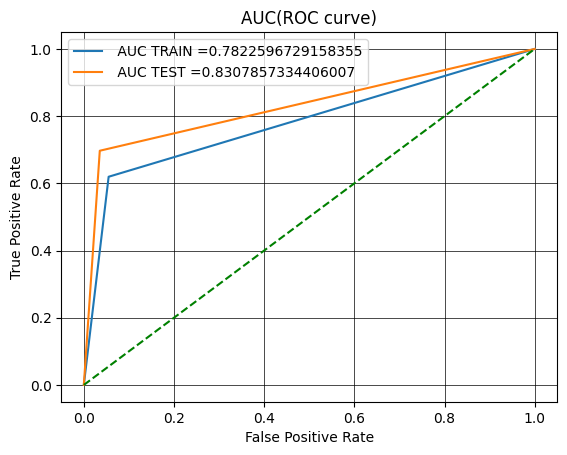

In [116]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [117]:
# This approach is initially not greedy, when the temperature is high. In this phase, it tolerates worse solutions 
# in the hope of escaping the local minima. After each iteration, as the temperature decreases, 
# it becomes more and more greedy, and ultimately looks to converge.
# A completely greedy approach never accepts a poorer solution and hence gets stuck in the local minima, unlike simulated annealing

# Q7(c)

In [118]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import fbeta_score

In [119]:
y_true = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [120]:
#making confusion Matrix to get true positive, true negative, false positive and false negative
cm = confusion_matrix(y_t, y_pred)
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

In [121]:
#calculating precision recall using formula
precision1 = tp / (tp+fp)
recall1 = tp / (tp+fn)

print(f"precision: {precision1}, recall: {recall1}")

precision: 0.5, recall: 1.0


In [122]:
#CALCULATING fBeta scores using formula
f05_score = (1.25 * precision1 * recall1) / (0.25 * precision1 + recall1)
f1_score = (2 * precision1 * recall1) / (precision1 + recall1)
f5_score = (26 * precision1 * recall1) / (25 * precision1 + recall1)

print(f"f0.5-score: {f05_score}, f1-score: {f1_score}, f5-score: {f5_score}")

f0.5-score: 0.5555555555555556, f1-score: 0.6666666666666666, f5-score: 0.9629629629629629


In [123]:
#calculating precision, recall, f0.5 score, f1-score, f5-score using in-built libraries
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)


f_05_score = fbeta_score(y_true, y_pred, beta=0.5)

f_1_score = fbeta_score(y_true, y_pred, beta=1.0)

f_5_score = fbeta_score(y_true, y_pred, beta=5.0)

print("Values using Formula\n")
print(f"precision: {precision1}, recall: {recall1}, f0.5-score: {f05_score}, f1-score: {f1_score}, f5-score: {f5_score}")

print("\nValues using library function")
print(f"precision: {precision}, recall: {recall}, f0.5-score: {f_05_score}, f1-score: {f_1_score}, f5-score: {f_5_score}")

Values using Formula

precision: 0.5, recall: 1.0, f0.5-score: 0.5555555555555556, f1-score: 0.6666666666666666, f5-score: 0.9629629629629629

Values using library function
precision: 0.5, recall: 1.0, f0.5-score: 0.5555555555555556, f1-score: 0.6666666666666666, f5-score: 0.9629629629629629
